# Population Growth of Denver Metro
(1) compare with US demographic data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# reading data
path = 'nst-est2017-alldata.csv.txt'
raw_pd = pd.read_csv(path)
raw_pd.head(3)
# len(raw_pd.columns) 121 columns thus should be focused on a limited count

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017
0,10.0,0,0,0.0,United States,308745538.0,308758105.0,309338421.0,311644280.0,313993272.0,...,0.000000,0.000000,0.00000,2.720900,2.920371,2.883643,3.173228,3.516743,3.513394,3.423941
1,20.0,1,0,0.0,Northeast Region,55317240.0,55318350.0,55388349.0,55642659.0,55860261.0,...,-6.103092,-6.619089,-5.55957,1.467950,0.779137,0.605873,-0.082832,-0.903931,-1.307503,-0.288930
2,20.0,2,0,0.0,Midwest Region,66927001.0,66929794.0,66973360.0,67141501.0,67318295.0,...,-3.458531,-3.307295,-2.30464,-1.187519,-1.010696,-0.120354,-0.752477,-1.323952,-1.160735,-0.191323


# Copy raw DataFrame for less columns
 - Copy _df for future plots
 - Raw _df has 121 columns
 - Extract only what is necessary for plotting in terms of project scope

In [7]:
# make a copy of the raw data before data mungling
plot1_df = raw_pd.copy()
# now extract columns by realted population columns for values
plot1_df = plot1_df[['NAME','POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014', 'POPESTIMATE2015', 'POPESTIMATE2016', 'POPESTIMATE2017']]
# groupby by name : states placed on the index then convert into _df by .sum() or .mean()
plot_groupby=plot1_df.groupby('NAME').mean()
# now states on columns since they will be plotted on legend individually while Year will be on index
plot_transpose = plot_groupby.T
# on the transposed dataframe, outliers are United States and Regions
plot_drop = plot_transpose.drop(columns={'United States', 'United States','Northeast Region','Midwest Region', 'South Region', 'West Region'})
# after dropping the outlier columns. only states left on the dataframe-which is preferred for plotting
plot_drop

NAME,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
POPESTIMATE2010,4785579.0,714015.0,6407002.0,2921737.0,37327690.0,5048029.0,3580171.0,899712.0,605040.0,18846461.0,...,816227.0,6355882.0,25241648.0,2775260.0,625842.0,8025206.0,6741386.0,1854315.0,5690403.0,564376.0
POPESTIMATE2011,4798649.0,722259.0,6465488.0,2938640.0,37672654.0,5116411.0,3591927.0,907884.0,620336.0,19097369.0,...,823338.0,6396281.0,25644424.0,2815430.0,626210.0,8107548.0,6819155.0,1854891.0,5705812.0,567602.0
POPESTIMATE2012,4813946.0,730825.0,6544211.0,2949208.0,38019006.0,5186330.0,3597705.0,916868.0,635630.0,19341327.0,...,832576.0,6450632.0,26078327.0,2854222.0,625606.0,8188656.0,6890899.0,1855360.0,5721075.0,576608.0
POPESTIMATE2013,4827660.0,736760.0,6616124.0,2956780.0,38347383.0,5262556.0,3602470.0,925114.0,650114.0,19584927.0,...,842513.0,6490795.0,26479279.0,2899961.0,626044.0,8261689.0,6963410.0,1852333.0,5736673.0,582341.0
POPESTIMATE2014,4840037.0,736759.0,6706435.0,2964800.0,38701278.0,5342311.0,3600188.0,934805.0,660797.0,19897747.0,...,849455.0,6540007.0,26954436.0,2938671.0,625665.0,8316902.0,7046931.0,1847624.0,5751272.0,583334.0
POPESTIMATE2015,4850858.0,737979.0,6802262.0,2975626.0,39032444.0,5440445.0,3593862.0,944107.0,672736.0,20268567.0,...,854036.0,6590726.0,27454880.0,2984917.0,624455.0,8366767.0,7152818.0,1839767.0,5759744.0,586102.0
POPESTIMATE2016,4860545.0,741522.0,6908642.0,2988231.0,39296476.0,5530105.0,3587685.0,952698.0,684336.0,20656589.0,...,861542.0,6649404.0,27904862.0,3044321.0,623354.0,8414380.0,7280934.0,1828637.0,5772917.0,584910.0
POPESTIMATE2017,4874747.0,739795.0,7016270.0,3004279.0,39536653.0,5607154.0,3588184.0,961939.0,693972.0,20984400.0,...,869666.0,6715984.0,28304596.0,3101833.0,623657.0,8470020.0,7405743.0,1815857.0,5795483.0,579315.0


In [8]:
# x_axis_raw ['POPESTIMATE2010', 'POPESTIMATE2011', 'POPESTIMATE2012'... ... ]
x_axis_raw = plot_drop.index
# takes the last four character of each string on column to obtain years
x_axis =x_axis_raw.map(lambda x: x[-4:])
# thus the years only ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']
x_axis

Index(['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017'], dtype='object')

# Data Visualization part:
- Plots data trends for  all states 
- Also for  Colorado individually        

In [39]:
# in this section, data visualization/plotting via for loops will be performed
print(str(len(plot_drop.columns)) + " elements on y_axis shown below")
# per the above, a clear set of what will be iterated through would be a good idea
print(plot_drop.columns)

52 elements on y_axis shown below
Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object', name='NAME')


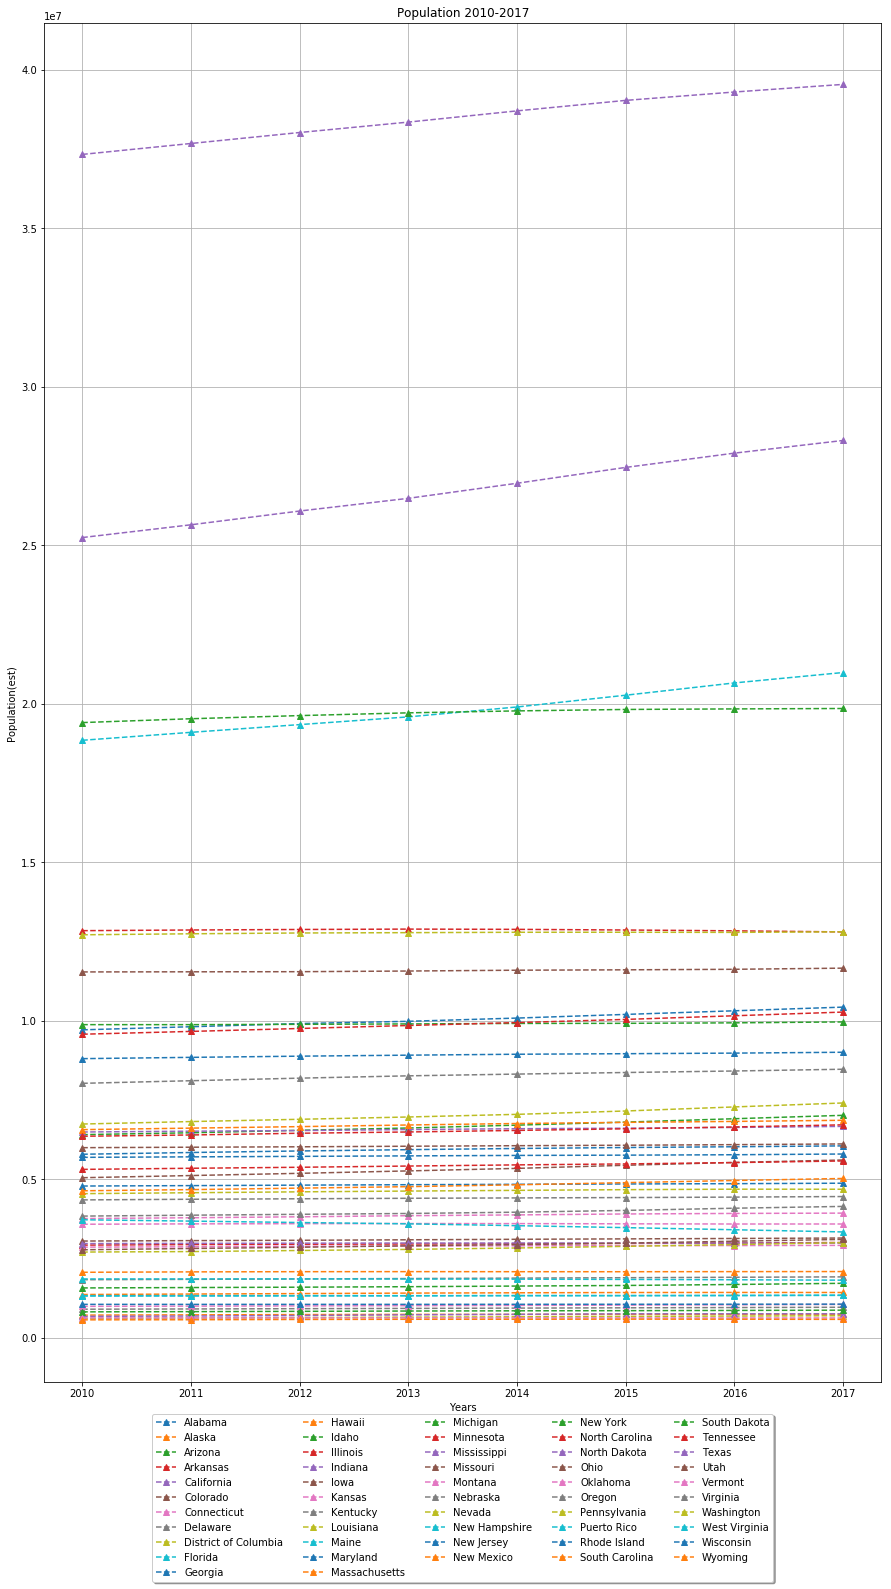

In [9]:
# chart cosmetics
plt.figure(figsize=(15,25))
plt.rcParams["font.size"] = 10
plt.grid()

# name stands for each element of columns/states Alabama,Alaska, Arizona, Arkansas etc...
for name in plot_drop.columns:
    plt.title("Population 2010-2017")
    plt.plot(x_axis, plot_drop[name], linestyle='--', marker= '^',label=name)
    plt.xlabel("Years")
    plt.ylabel("Population(est)")
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.02),
               fancybox=True, shadow=True, ncol=5)
plt.show()

..0# CO only +

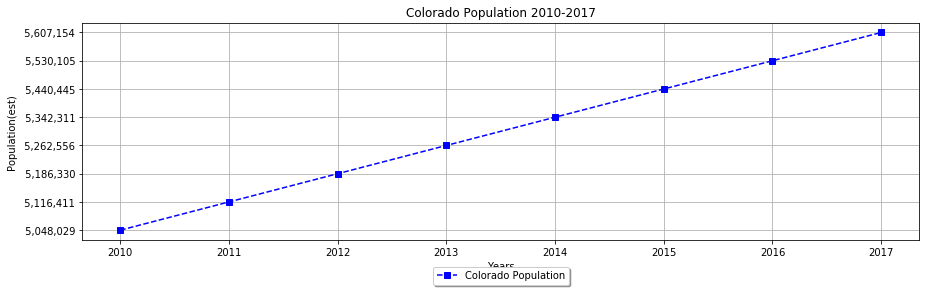

In [51]:
# pre-set chart parameters, mostly cosmetic and useful titles and axis names
plt.figure(figsize=(15,4))
plt.rcParams["font.size"] = 10
plt.grid()
plt.title("Colorado Population 2010-2017")

# use raw data ie. 5100000
# CO_Plot = plt.plot(x_axis,plot_drop['Colorado'], linestyle='--', marker= 's', color = 'b', label='Colorado Population')

# formatted y_axis that shows plot with comma and decimals in a relatively presentable format
# now formatted output data ie. 5,048,029
CO_Plot = plt.plot(x_axis,plot_drop['Colorado'].map(" {:,.0f}".format), linestyle='--', marker= 's', color = 'b', label='Colorado Population')

# cosmetics go on...
plt.xlabel("Years")
plt.ylabel("Population(est)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
plt.show()

# Creating a new DataFrame by percentage changes
 - a good idea to observe trends with a dataframe consisting of rates (percentage rates) only

In [73]:
# create new dataframe object with percentage changes of each value with respect to
# previous value in column 
percgrowth_df = plot_drop.pct_change()
# percgrowth_df.dtypes all float thus could be mapped
# percgrowth_df.style.format("{:.2%}")
percgrowth_df

NAME,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
POPESTIMATE2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POPESTIMATE2011,0.002731,0.011546,0.009128,0.005785,0.009242,0.013546,0.003284,0.009083,0.025281,0.013313,...,0.008712,0.006356,0.015957,0.014474,0.000588,0.010260,0.011536,0.000311,0.002708,0.005716
POPESTIMATE2012,0.003188,0.011860,0.012176,0.003596,0.009194,0.013666,0.001609,0.009896,0.024654,0.012774,...,0.011220,0.008497,0.016920,0.013778,-0.000965,0.010004,0.010521,0.000253,0.002675,0.015867
POPESTIMATE2013,0.002849,0.008121,0.010989,0.002567,0.008637,0.014697,0.001324,0.008994,0.022787,0.012595,...,0.011935,0.006226,0.015375,0.016025,0.000700,0.008919,0.010523,-0.001631,0.002726,0.009943
POPESTIMATE2014,0.002564,-0.000001,0.013650,0.002712,0.009229,0.015155,-0.000633,0.010475,0.016433,0.015972,...,0.008240,0.007582,0.017944,0.013348,-0.000605,0.006683,0.011994,-0.002542,0.002545,0.001705
POPESTIMATE2015,0.002236,0.001656,0.014289,0.003652,0.008557,0.018369,-0.001757,0.009951,0.018068,0.018636,...,0.005393,0.007755,0.018566,0.015737,-0.001934,0.005996,0.015026,-0.004252,0.001473,0.004745
POPESTIMATE2016,0.001997,0.004801,0.015639,0.004236,0.006764,0.016480,-0.001719,0.009100,0.017243,0.019144,...,0.008789,0.008903,0.016390,0.019901,-0.001763,0.005691,0.017911,-0.006050,0.002287,-0.002034
POPESTIMATE2017,0.002922,-0.002329,0.015579,0.005370,0.006112,0.013933,0.000139,0.009700,0.014081,0.015870,...,0.009430,0.010013,0.014325,0.018892,0.000486,0.006612,0.017142,-0.006989,0.003909,-0.009566


# Top Ten states with highest population growth
 - plot of top ten to find out similarities with Colorado

NAME
District of Columbia    0.019792
Texas                   0.016497
North Dakota            0.016368
Utah                    0.016022
Florida                 0.015472
Colorado                0.015121
Nevada                  0.014931
Washington              0.013522
Arizona                 0.013064
Idaho                   0.012792
dtype: float64


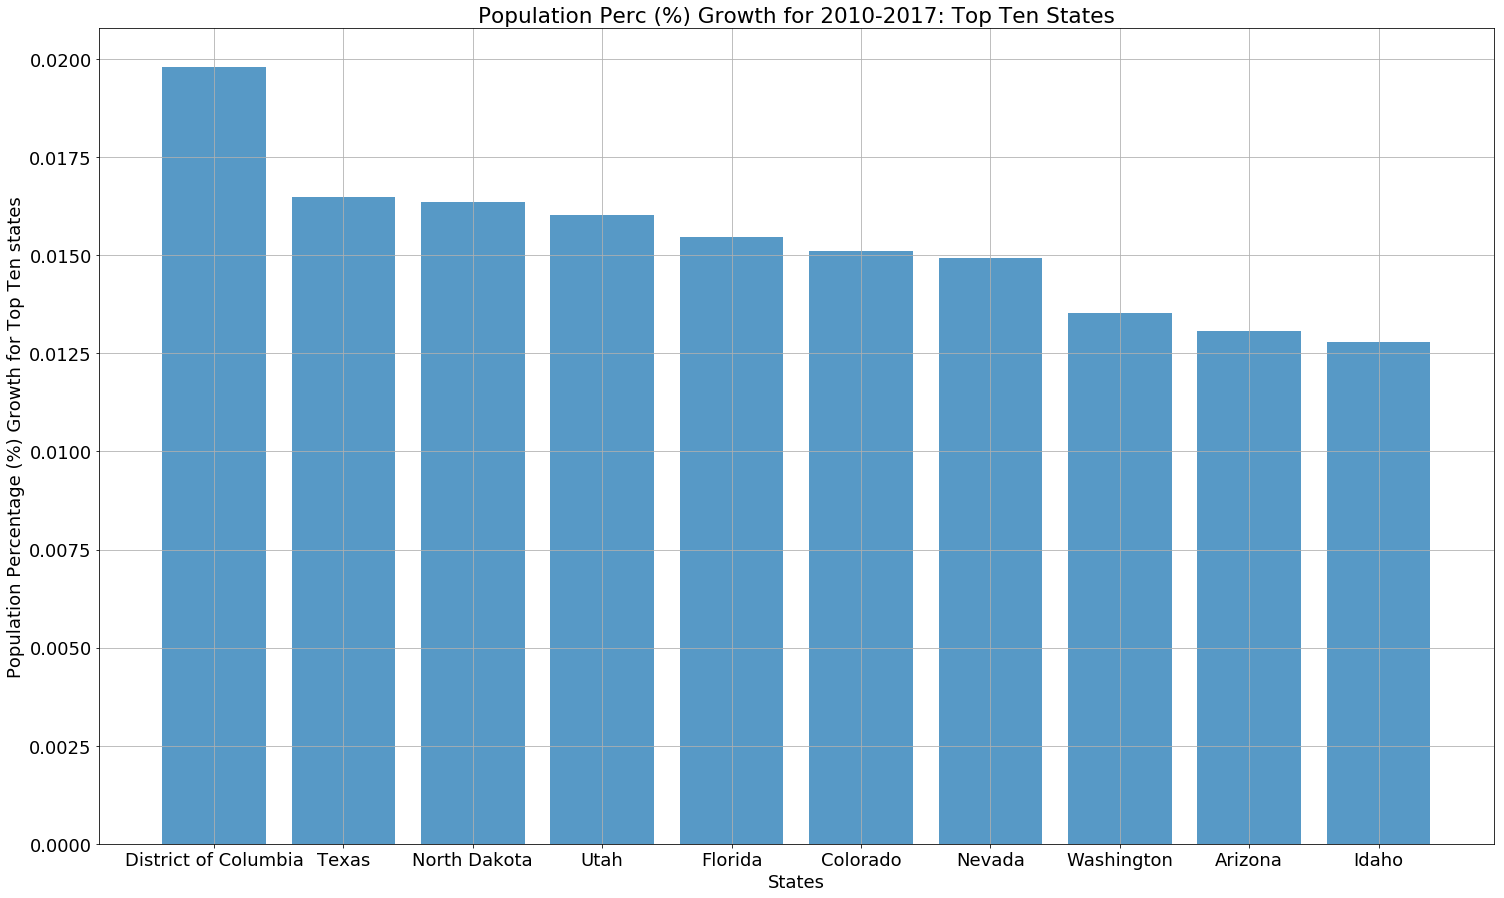

In [108]:
# sort top ten highest growing states 
# objective is creating a y_axis for next plot
state_mean_list = percgrowth_df.mean()
#  type(state_mean_list)confirms Series
state_mean_sorted_list = state_mean_list.sort_values(ascending=False)
# extracts top ten states
state_mean_sorted_list_TopTen = state_mean_sorted_list[:10]

# percgrowth_df.mean().sort_values()
# pre-styling scatter plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 18
plt.grid(True)
plt.title("Population Perc (%) Growth for 2010-2017: Top Ten States")
plt.xlabel("States")
plt.ylabel("Population Percentage (%) Growth for Top Ten states")
plt.bar(state_mean_sorted_list_TopTen.index,state_mean_sorted_list_TopTen,alpha=0.75)

print(state_mean_sorted_list_TopTen)

In [3]:
# pre-styling scatter plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 18
plt.grid(True)
plt.title("Population Perc (%) Growth for 2010-2017: Top Ten States")
plt.xlabel("States")
plt.ylabel("Population Percentage (%) Growth for Top Ten states")
color_list= ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w','b', 'g']
print(len(color_list))
plt.scatter(percscatter_yaxis.index,percscatter_yaxis, marker="o", s=500,alpha=0.75)
plt.show()

NameError: name 'plt' is not defined

In [46]:
percgrowth_df['Colorado']
# percgrowth_df['Year'] = percgrowth_df['index'].map(lambda x: x[-4:])
percgrowth_df
# percgrowth_df = percgrowth_df.reset_index()
# percgrowth_df = percgrowth_df.drop(columns='index')
# percgrowth_df = percgrowth_df.drop(columns='level_0')
# percgrowth_df = percgrowth_df.set_index('Year')

NAME,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,Year,Average Growth
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010,NaN
1,0.002731,0.011546,0.009128,0.005785,0.009242,0.013546,0.003284,0.009083,0.025281,0.013313,...,0.015957,0.014474,0.000588,0.010260,0.011536,0.000311,0.002708,0.005716,2011,0.006452
2,0.003188,0.011860,0.012176,0.003596,0.009194,0.013666,0.001609,0.009896,0.024654,0.012774,...,0.016920,0.013778,-0.000965,0.010004,0.010521,0.000253,0.002675,0.015867,2012,0.006913
3,0.002849,0.008121,0.010989,0.002567,0.008637,0.014697,0.001324,0.008994,0.022787,0.012595,...,0.015375,0.016025,0.000700,0.008919,0.010523,-0.001631,0.002726,0.009943,2013,0.006668
4,0.002564,-0.000001,0.013650,0.002712,0.009229,0.015155,-0.000633,0.010475,0.016433,0.015972,...,0.017944,0.013348,-0.000605,0.006683,0.011994,-0.002542,0.002545,0.001705,2014,0.006080
5,0.002236,0.001656,0.014289,0.003652,0.008557,0.018369,-0.001757,0.009951,0.018068,0.018636,...,0.018566,0.015737,-0.001934,0.005996,0.015026,-0.004252,0.001473,0.004745,2015,0.006027
6,0.001997,0.004801,0.015639,0.004236,0.006764,0.016480,-0.001719,0.009100,0.017243,0.019144,...,0.016390,0.019901,-0.001763,0.005691,0.017911,-0.006050,0.002287,-0.002034,2016,0.005894
7,0.002922,-0.002329,0.015579,0.005370,0.006112,0.013933,0.000139,0.009700,0.014081,0.015870,...,0.014325,0.018892,0.000486,0.006612,0.017142,-0.006989,0.003909,-0.009566,2017,0.005687


# Colorado vs Average
 - observe overall trend vs Colorado

In [27]:

percgrowth_df['Average Growth'] = percgrowth_df.mean(axis=1)
percgrowth_df['Colorado']
percgrowth_df['Average Growth']
percgrowth_df

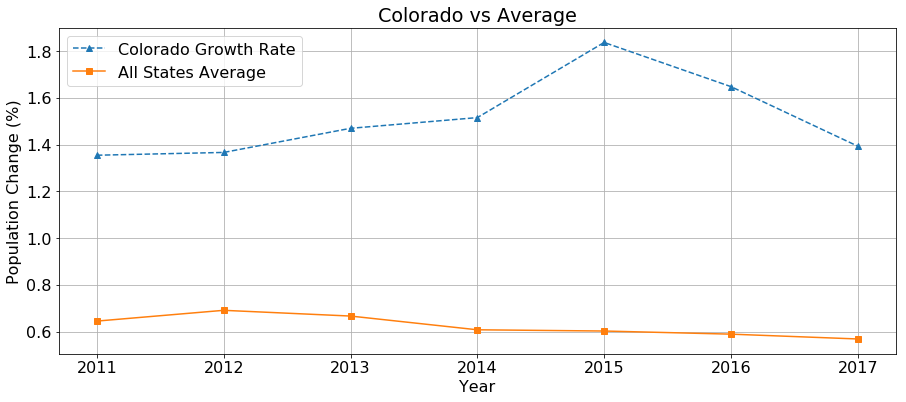

In [44]:
plt.figure(figsize=(15,6))
plt.title("Colorado vs Average")
plt.xlabel("Year")
plt.ylabel("Population Change (%)")
plt.grid()
plt.rcParams["font.size"] = 16
plt.plot(percgrowth_df['Year'],percgrowth_df['Colorado']*100, linestyle='--', marker= '^',label='Colorado Growth Rate')
plt.plot(percgrowth_df['Year'],percgrowth_df['Average Growth']*100, linestyle='-', marker= 's',label='All States Average')
plt.legend(loc='best')


# Colorado vs Neighbours
 - plot all neighbour states vs Colorado to see any significant regional similarity

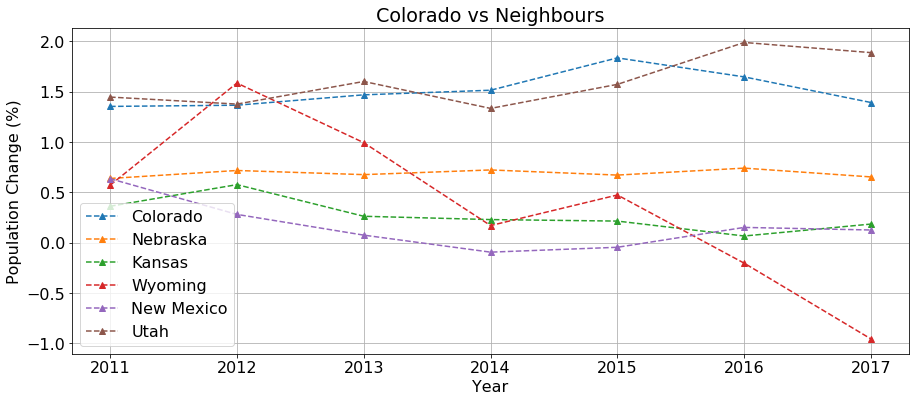

In [77]:
plt.figure(figsize=(15,6))
plt.title("Colorado vs Neighbours")
plt.xlabel("Year")
plt.ylabel("Population Change (%)")
plt.grid()
plt.rcParams["font.size"] = 16
neighbours_list = ['Colorado', 'Nebraska', 'Kansas', 'Wyoming', 'New Mexico', 'Utah']
for state in neighbours_list:
    plt.plot(percgrowth_df['Year'],percgrowth_df[state]*100, linestyle='--', marker= '^',label=state)
    plt.legend(loc='best')

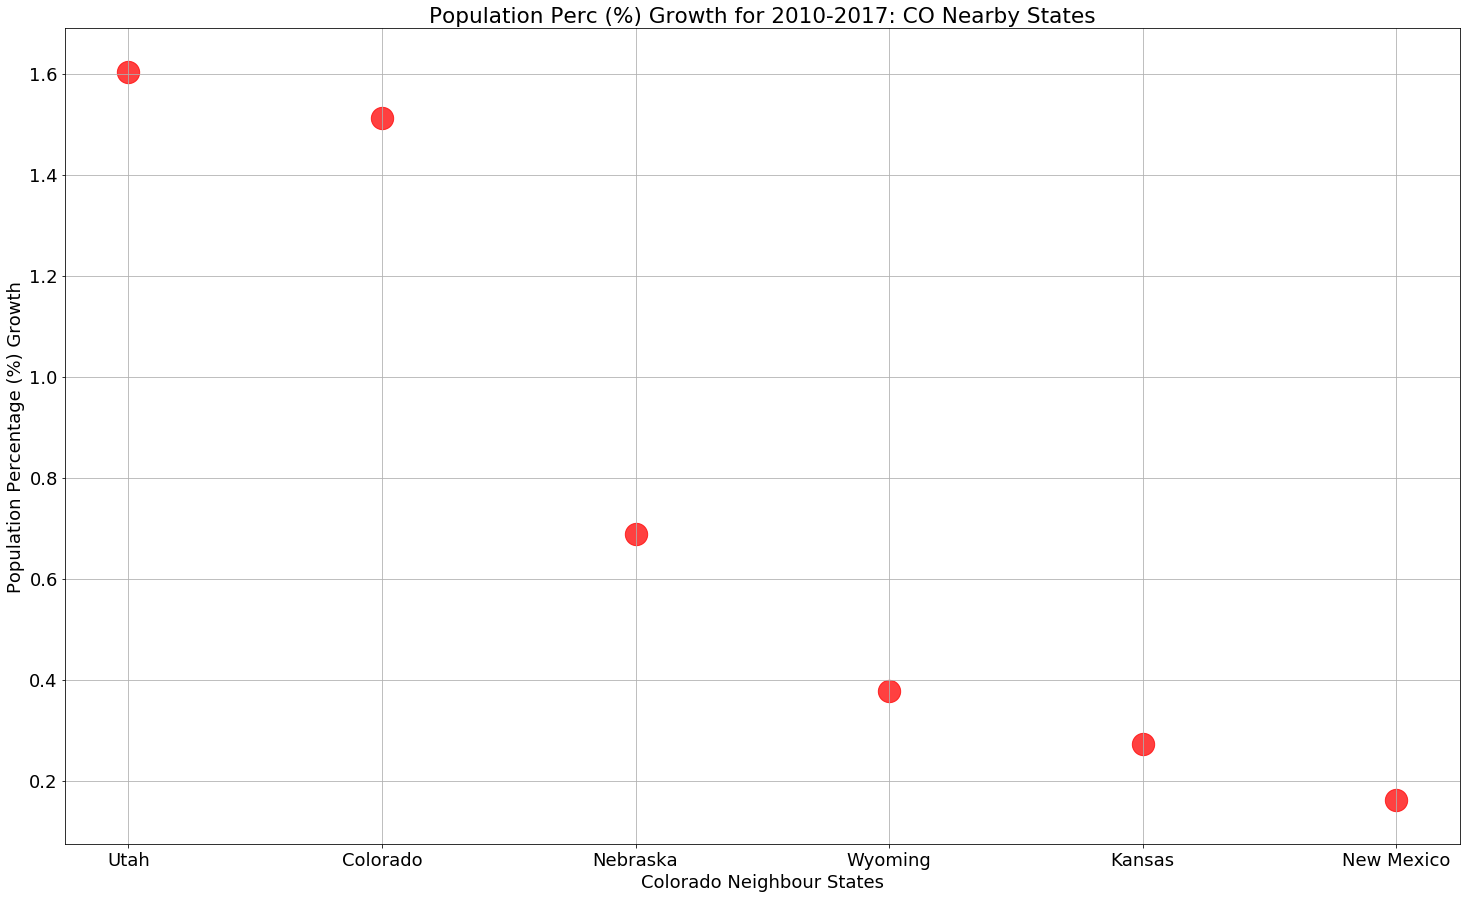

In [100]:
# pre-styling scatter plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 18
plt.grid(True)
plt.title("Population Perc (%) Growth for 2010-2017: CO Nearby States")
plt.xlabel("Colorado Neighbour States")
plt.ylabel("Population Percentage (%) Growth")
meanpercneighbours_list = percgrowth_df[['Colorado', 'Nebraska', 'Kansas', 'Wyoming', 'New Mexico', 'Utah']].mean()*100
meanpercneighbours_list = meanpercneighbours_list.sort_values(ascending=False)
plt.scatter(meanpercneighbours_list.index,meanpercneighbours_list, marker="o",facecolor='r', s=500,alpha=0.75)
# plt.show()